## Task B

In [1]:
# import the package needed
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
matplotlib.style.use("ggplot")
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Task B: Exploratory Analysis on Big Data

### B1. Summarising the Data

In [2]:
df = pd.read_csv('InsuranceRates.csv')
# df1.head()

#B1.1
print ("there are ",len(df), "rows and", len(df.columns), "columns")

there are  12694445 rows and 7 columns


In [3]:
#B1.2
year = df.BusinessYear.unique()
year_str = ",".join(map(str,year))
print ("The data cover in", len(year),"years:",year_str )

The data cover in 3 years: 2014,2015,2016


In [4]:
#B1.3
age = df.Age.unique()
age_cat = "; ".join(map(str,age))
print ("Value for age:",age_cat )

Value for age: 0-20; Family Option; 21; 22; 23; 24; 25; 26; 27; 28; 29; 30; 31; 32; 33; 34; 35; 36; 37; 38; 39; 40; 41; 42; 43; 44; 45; 46; 47; 48; 49; 50; 51; 52; 53; 54; 55; 56; 57; 58; 59; 60; 61; 62; 63; 64; 65 and over


In [5]:
#B1.4
stateCode = df.StateCode.unique()
stateCode_str = "; ".join(map(str,stateCode))
print ("There are", len(stateCode),"states:",stateCode_str)

There are 39 states: AK; AL; AZ; FL; GA; IN; LA; MO; MS; NC; ND; NJ; OK; PA; SC; TN; TX; WI; WY; AR; DE; IL; KS; ME; MI; MT; NH; NM; VA; WV; IA; ID; NE; OH; SD; UT; NV; OR; HI


In [6]:
#B1.5
issuerId = df.IssuerId.unique()
print ("There are", len(issuerId),"insurance providers")

There are 910 insurance providers


In [7]:
#B1.6
print ("Monthly average values:", df['IndividualRate'].mean())
print ("Monthly maximum values:", df['IndividualRate'].max())
print ("Monthly minimum values:", df['IndividualRate'].min())
# answer 

Monthly average values: 4098.026458581588
Monthly maximum values: 999999.0
Monthly minimum values: 0.0


In [8]:
#B1.7
df_notnull_forIndividualTobaccoRate = df[df['IndividualTobaccoRate'].notnull()]

df_diff = df_notnull_forIndividualTobaccoRate['IndividualTobaccoRate']- \
           df_notnull_forIndividualTobaccoRate['IndividualRate']
    
ave = round(sum(df_diff) / len(df_diff),2)
print ("Cost of plans for smokers is", ave, "more than the cost of plans for non-smoker in average.")

Cost of plans for smokers is 88.91 more than the cost of plans for non-smoker in average.


### B2. Investigating Individual Insurance Costs

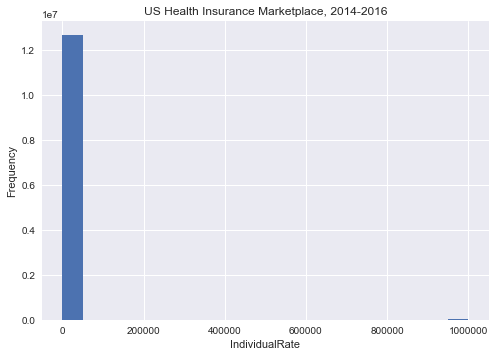

In [9]:
##B2.1 Show the distribution of ‘IndividualRate’ values using a histogram.
df['IndividualRate'].plot.hist(bins=20)
plt.xlabel('IndividualRate')
plt.title('US Health Insurance Marketplace, 2014-2016')

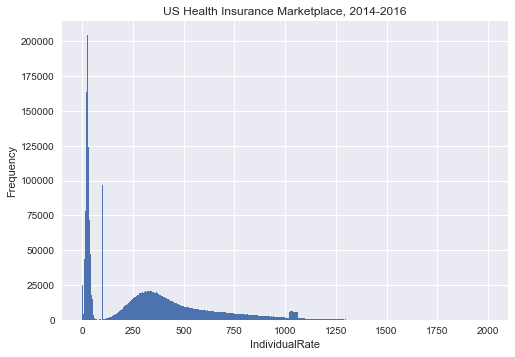

In [10]:
##B2.2 Remove rows with insurance premiums of 0 (or less) and over 2000. 
##(Use this data from now on.) Generate a new histogram with a larger number of bins (say 200).
df_new = df[(df['IndividualRate'] > 0) & (df['IndividualRate'] <= 2000)]
df_new['IndividualRate'].plot.hist(bins=2000)
plt.xlabel('IndividualRate')
plt.title('US Health Insurance Marketplace, 2014-2016')

### B3. Variation in Costs across States

### B3.1 Generate a graph containing boxplots summarising the distribution of values for each state.

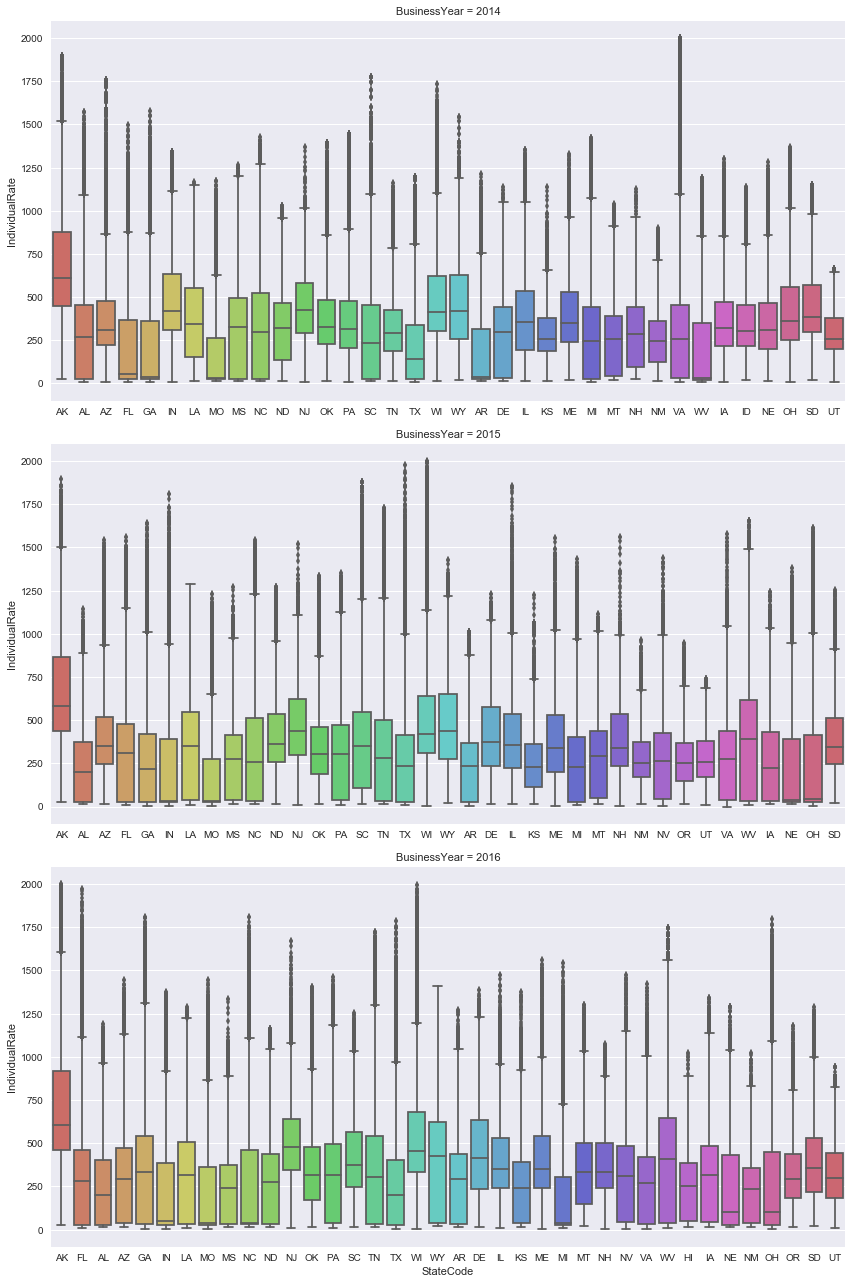

In [11]:
data = df_new
g = sns.FacetGrid(data, row="BusinessYear",sharex=False, size=6, aspect=2)
g.map(sns.boxplot, "StateCode", "IndividualRate", palette="hls")

### B3.2 Create a bar chart of the number of insurance companies in each state for variation of insurance companies across states

In [12]:
stateCode_14 = df_new.StateCode[df_new.BusinessYear == 2014].unique()
issuerId_state = []
for item in stateCode_14:
    temp = df_new.IssuerId[(df_new.StateCode== item) & (df_new.BusinessYear == 2014)]
    issuerId_state.append(temp)
issuerId_state

com_state_14 = []
for i in range(0,len(issuerId_state)):
    temp=issuerId_state[i].unique()
    com_state_14.append(len(temp))
len(com_state_14)

data = {'BusinessYear': "2014",
         'Number of Insurance Companies': com_state_14,
         'StateCode': stateCode_14}
        
companies_stat_14 = pd.DataFrame.from_dict(data )
companies_stat_14.head()

,BusinessYear,Number of Insurance Companies,StateCode
0,2014,8,AK
1,2014,9,AL
2,2014,21,AZ
3,2014,24,FL
4,2014,16,GA


In [13]:
stateCode_15 = df_new.StateCode[df_new.BusinessYear == 2015].unique()
issuerId_state = []
for item in stateCode_15:
    temp = df_new.IssuerId[(df_new.StateCode== item) & (df_new.BusinessYear == 2015)]
    issuerId_state.append(temp)
issuerId_state

com_state_15 = []
for i in range(0,len(issuerId_state)):
    temp=issuerId_state[i].unique()
    com_state_15.append(len(temp))
len(com_state_15)

data = {'BusinessYear': "2015",
         'Number of Insurance Companies': com_state_15,
         'StateCode': stateCode_15}
        
companies_stat_15 = pd.DataFrame.from_dict(data )
companies_stat_15.head()

,BusinessYear,Number of Insurance Companies,StateCode
0,2015,12,AK
1,2015,16,AL
2,2015,34,AZ
3,2015,32,FL
4,2015,29,GA


In [14]:
stateCode_16 = df_new.StateCode[df_new.BusinessYear == 2016].unique()
issuerId_state = []
for item in stateCode_16:
    temp = df_new.IssuerId[(df_new.StateCode== item) & (df_new.BusinessYear == 2016)]
    issuerId_state.append(temp)
issuerId_state

com_state_16 = []
for i in range(0,len(issuerId_state)):
    temp=issuerId_state[i].unique()
    com_state_16.append(len(temp))
len(com_state_16)

data = {'BusinessYear': "2016",
         'Number of Insurance Companies': com_state_16,
         'StateCode': stateCode_16}
        
companies_stat_16 = pd.DataFrame.from_dict(data )
companies_stat_16.head()

,BusinessYear,Number of Insurance Companies,StateCode
0,2016,10,AK
1,2016,31,FL
2,2016,15,AL
3,2016,31,AZ
4,2016,30,GA


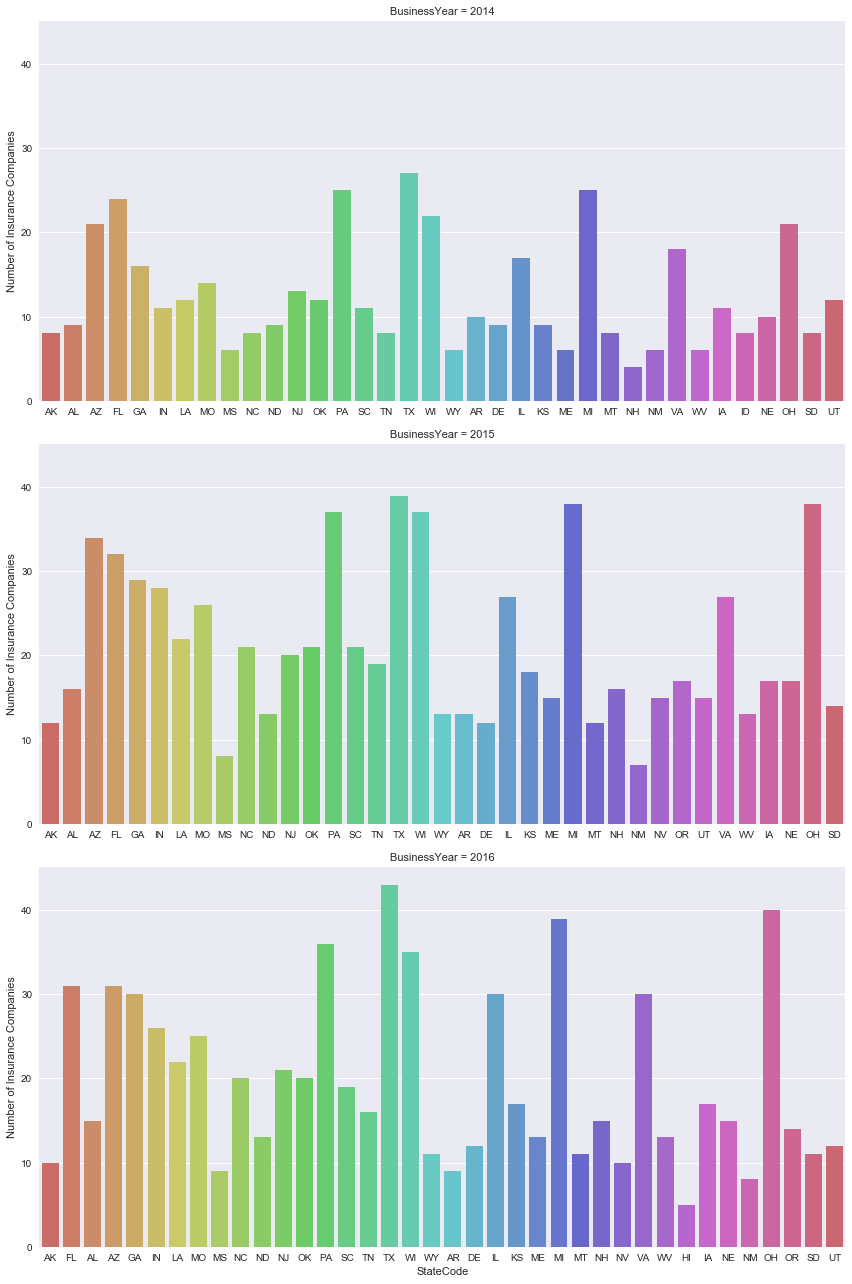

In [15]:
# combine all the dataframe to one contains data from 2014 - 2016
frames = [companies_stat_14, companies_stat_15, companies_stat_16]
df_companies_stat = pd.DataFrame
df_companies_stat = pd.concat(frames)
df_companies_stat.head()

data = df_companies_stat

g = sns.FacetGrid(data, row="BusinessYear",sharex=False, size=6, aspect=2)
g.map(sns.barplot, 'StateCode', 'Number of Insurance Companies',palette="hls")

### B3.3 scatterplot to plot the number of insurance issuers against the median insurance cost for each state.

In [16]:
rate_state_14 = []
for item in stateCode_14:
    temp = df_new.IndividualRate[(df_new.StateCode== item) & (df_new.BusinessYear == 2014)]
    rate_state_14.append(round(temp.median(),2))
rate_state_14

data = {'BusinessYear': "2014",
         'StateCode': stateCode_14,
         'Median IndividualRate': rate_state_14}
        
Median_IndividualRate_14 = pd.DataFrame.from_dict(data )
Median_IndividualRate_14.head()

,BusinessYear,Median IndividualRate,StateCode
0,2014,610.81,AK
1,2014,271.24,AL
2,2014,310.26,AZ
3,2014,54.95,FL
4,2014,39.15,GA


In [17]:
rate_state_15 = []
for item in stateCode_15:
    temp = df_new.IndividualRate[(df_new.StateCode== item) & (df_new.BusinessYear == 2015)]
    rate_state_15.append(round(temp.median(),2))
rate_state_15

data = {'BusinessYear': "2015",
         'StateCode': stateCode_15,
         'Median IndividualRate': rate_state_15}
        
Median_IndividualRate_15 = pd.DataFrame.from_dict(data )
Median_IndividualRate_15.head()

,BusinessYear,Median IndividualRate,StateCode
0,2015,584.28,AK
1,2015,201.13,AL
2,2015,347.69,AZ
3,2015,310.70,FL
4,2015,220.00,GA


In [18]:
rate_state_16 = []
for item in stateCode_16:
    temp = df_new.IndividualRate[(df_new.StateCode== item) & (df_new.BusinessYear == 2016)]
    rate_state_16.append(round(temp.median(),2))
rate_state_16

data = {'BusinessYear': "2016",
         'StateCode': stateCode_16,
         'Median IndividualRate': rate_state_16}
        
Median_IndividualRate_16 = pd.DataFrame.from_dict(data )
Median_IndividualRate_16.head()

,BusinessYear,Median IndividualRate,StateCode
0,2016,604.76,AK
1,2016,279.39,FL
2,2016,198.23,AL
3,2016,293.32,AZ
4,2016,332.98,GA


In [19]:
frames = [Median_IndividualRate_14, Median_IndividualRate_15, Median_IndividualRate_16]
df_medRate_stat = pd.DataFrame
df_medRate_stat = pd.concat(frames)
df_medRate_stat

df_companies_medRate_stat = pd.DataFrame()
df_companies_medRate_stat = pd.merge(df_companies_stat, df_medRate_stat, on=["StateCode",'BusinessYear'], how='outer')
df_companies_medRate_stat
df_companies_medRate_stat.reset_index(drop=True, inplace=True)
df_companies_medRate_stat.head()

,BusinessYear,Number of Insurance Companies,StateCode,Median IndividualRate
0,2014,8,AK,610.81
1,2014,9,AL,271.24
2,2014,21,AZ,310.26
3,2014,24,FL,54.95
4,2014,16,GA,39.15


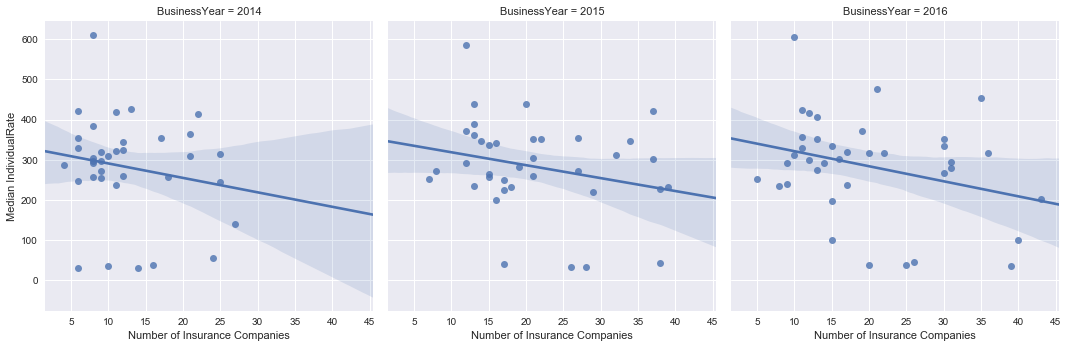

In [20]:
data = df_companies_medRate_stat
g = sns.lmplot(x= 'Number of Insurance Companies', y='Median IndividualRate',col="BusinessYear", data=data, fit_reg=True)

### B4. Variation in Costs over Time and with Age

### B4.1 boxplot of insurance costs versus year

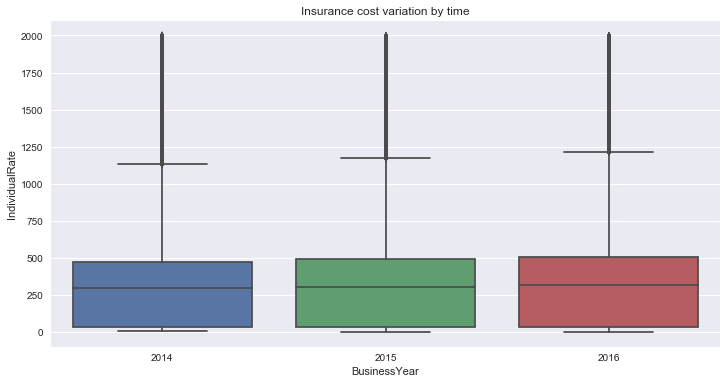

In [21]:
df_new
data = df_new

plt.figure(figsize = (12, 6))
axnew= sns.boxplot(x="BusinessYear", y="IndividualRate", data = data).set_title('Insurance cost variation by time')

### B4.2 boxplot of insurance costs versus age

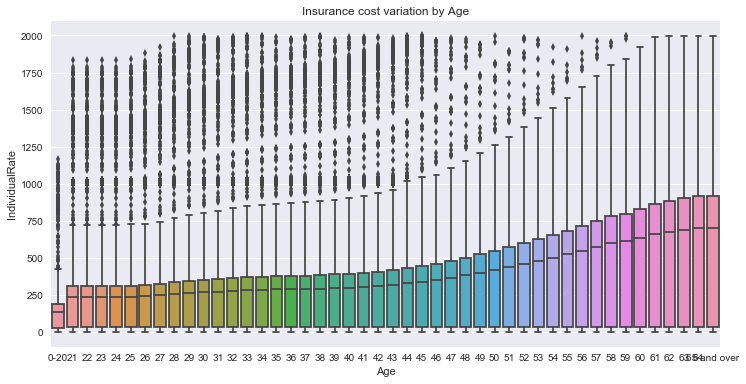

In [22]:
# adject index。 65-over
df_del_familyOption = df_new[df_new.Age != "Family Option"]

data = df_del_familyOption

plt.figure(figsize = (12, 6))
axnew= sns.boxplot(x="Age", y="IndividualRate", data = data).set_title('Insurance cost variation by Age')